<a href="https://colab.research.google.com/github/Vishal-74/SoluLAB/blob/main/Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

EDA

In [ ]:
df = pd.read_csv("employee attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.shape

(1470, 35)

<Axes: xlabel='Gender', ylabel='count'>

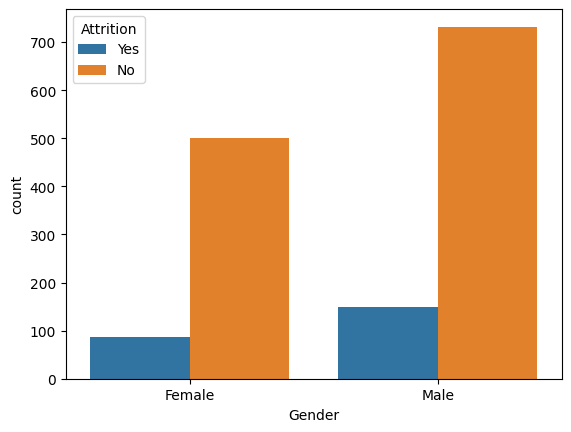

In [ ]:
import seaborn as sns
sns.countplot(x = 'Gender', data = df, hue = 'Attrition')

<Axes: xlabel='JobRole', ylabel='count'>

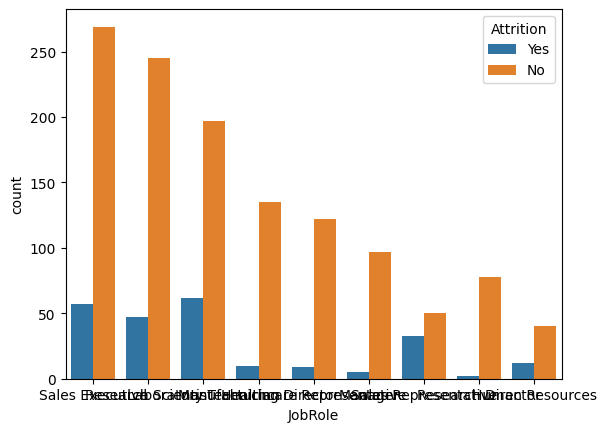

In [ ]:
sns.countplot(x = 'JobRole', data = df, hue = 'Attrition')

<Axes: xlabel='OverTime', ylabel='count'>

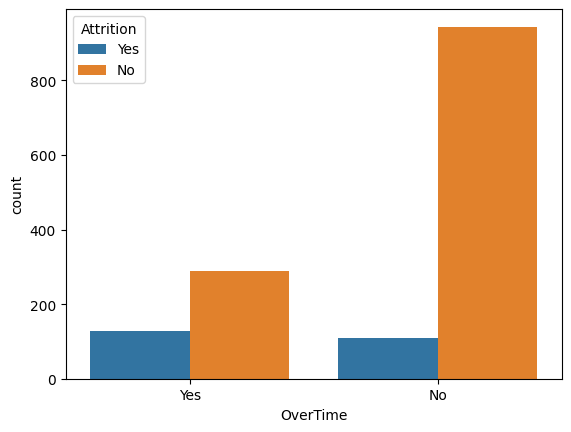

In [ ]:
sns.countplot(x = 'OverTime', data = df, hue = 'Attrition')

<Axes: xlabel='Age', ylabel='count'>

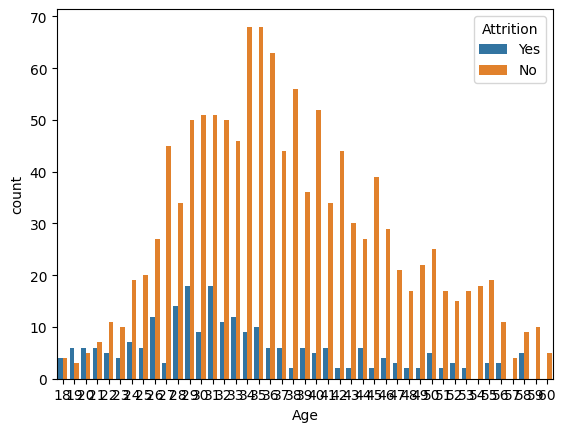

In [ ]:
sns.countplot(x = 'Age', data = df, hue = 'Attrition')

<Axes: xlabel='Department', ylabel='count'>

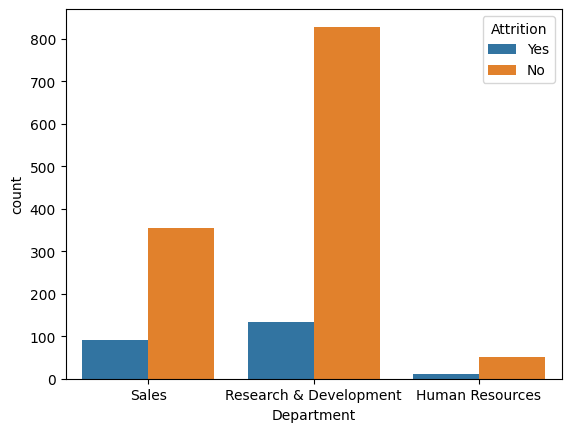

In [ ]:
sns.countplot(x = 'Department', data = df, hue = 'Attrition')

<Axes: xlabel='MaritalStatus', ylabel='count'>

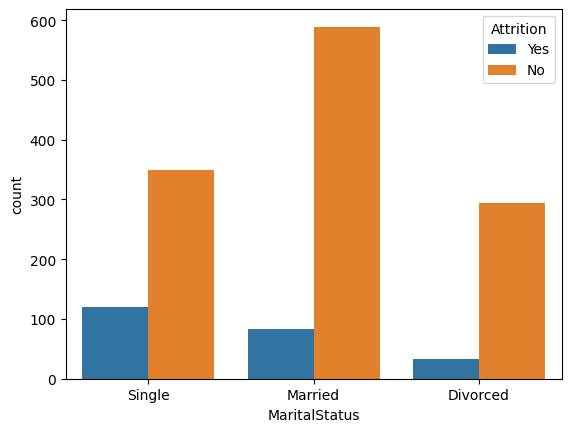

In [ ]:
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Attrition')

<Axes: xlabel='Education', ylabel='count'>

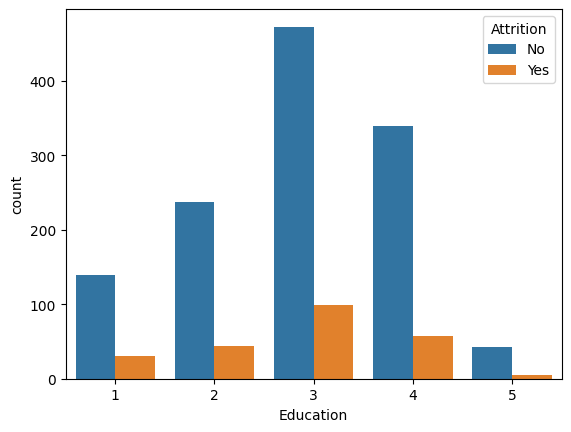

In [ ]:
sns.countplot(x = 'Education', data = df, hue = 'Attrition')

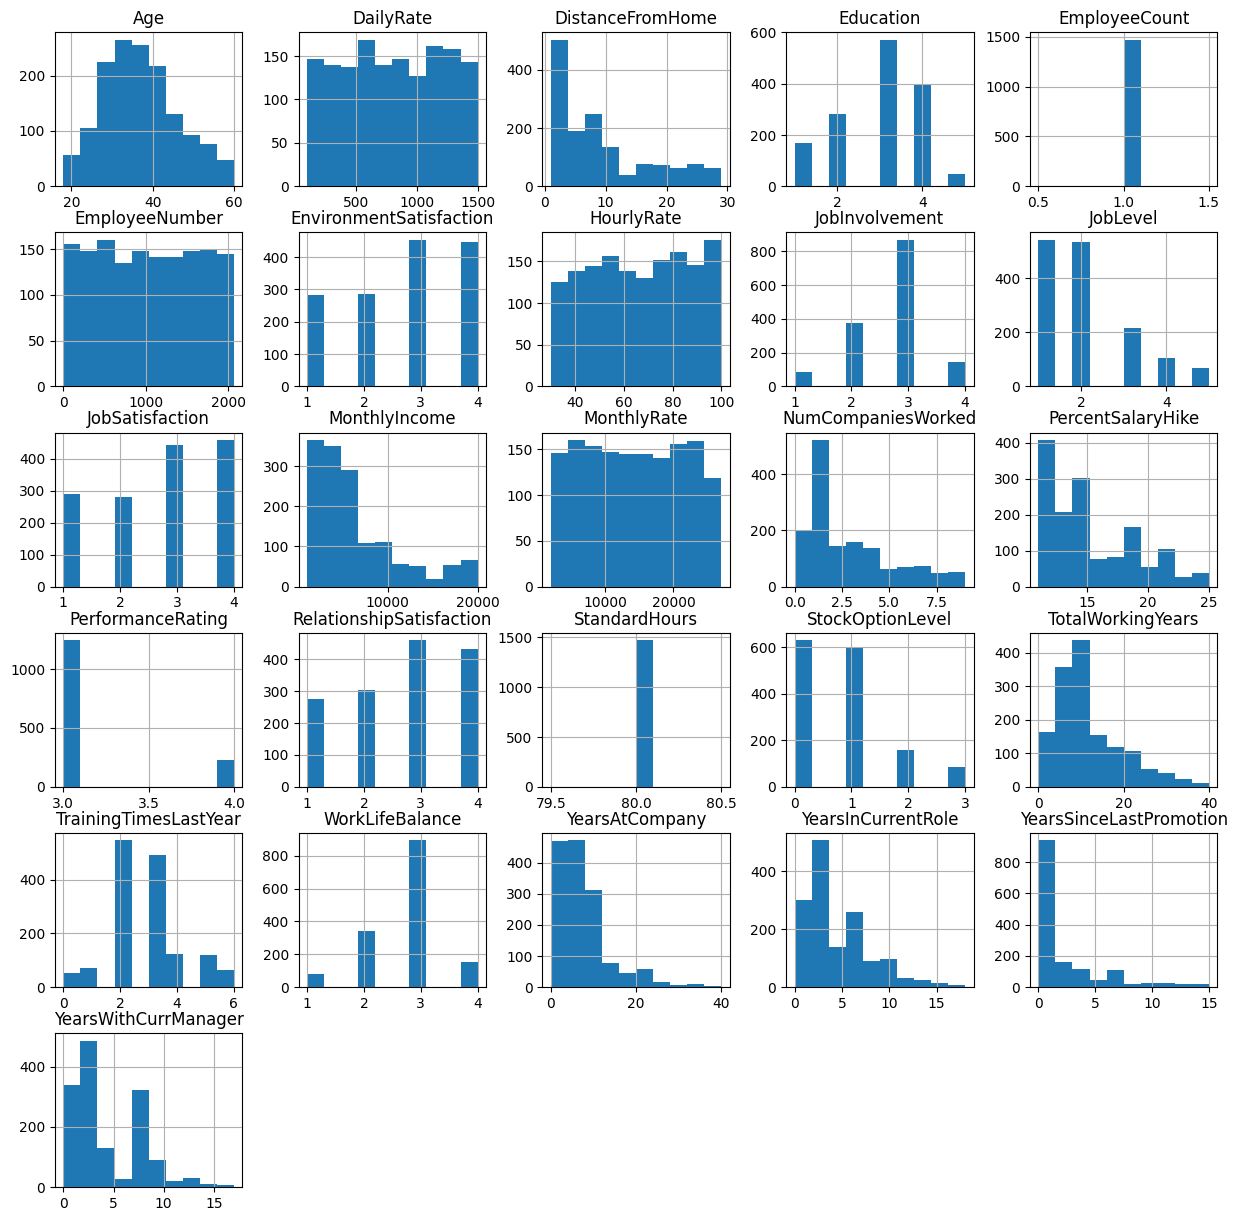

In [ ]:
df.hist(figsize = (15,15))
plt.show()

Data Cleaning

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.EmployeeNumber.value_counts()

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
ObjectClass_Columns = df.select_dtypes(include=["object"]).columns

In [ ]:
for col in ObjectClass_Columns:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())
    print()

Attrition
['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Res

2 categories columns - overTime over18 gender attrition

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_2_encode = ['Attrition', 'Gender', 'Over18', 'OverTime']
label_encoder = LabelEncoder()
for col in columns_2_encode:
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
ObjectClass_Columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
s = set(columns_2_encode)
columns_1_encoder = []

for i in ObjectClass_Columns:
  if i in s:
    continue
  else:
    columns_1_encoder.append(i)


In [ ]:
columns_1_encoder

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [ ]:
df_encoded = pd.get_dummies(df, columns=columns_1_encoder, drop_first = True)
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_encoded.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,...,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df_encoded.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

Model Building


In [ ]:
x = df_encoded.drop('Attrition',axis=1)
y = df_encoded['Attrition']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
print(f"Training Score:{model.score(X_train,y_train)*100}%")

Training Score:99.18330308529946%


In [ ]:
print(f"Test score:{model.score(X_test,y_test)*100}%")

Test score:86.95652173913044%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)




[Logistic Regression] training data accuracy is : 0.885662
[Logistic Regression] test data accuracy is : 0.910326
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.779891
[KNN] training data accuracy is : 0.881125
[KNN] test data accuracy is : 0.826087
[SVM] training data accuracy is : 0.845735
[SVM] test data accuracy is : 0.866848
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.869565
[Naive Bayes] training data accuracy is : 0.767695
[Naive Bayes] test data accuracy is : 0.758152


In [ ]:

model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.9103260869565217,
 'KNN classifier': 0.8260869565217391,
 'Support Vector Machine': 0.8668478260869565,
 'Random forest': 0.8695652173913043,
 'Decision tree': 0.779891304347826,
 'Naive Bayes': 0.7581521739130435}

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368



In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       320
           1       0.94      0.33      0.49        48

    accuracy                           0.91       368
   macro avg       0.93      0.67      0.72       368
weighted avg       0.91      0.91      0.89       368



In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.910326,0.826087,0.866848,0.869565,0.779891,0.758152


<Axes: >

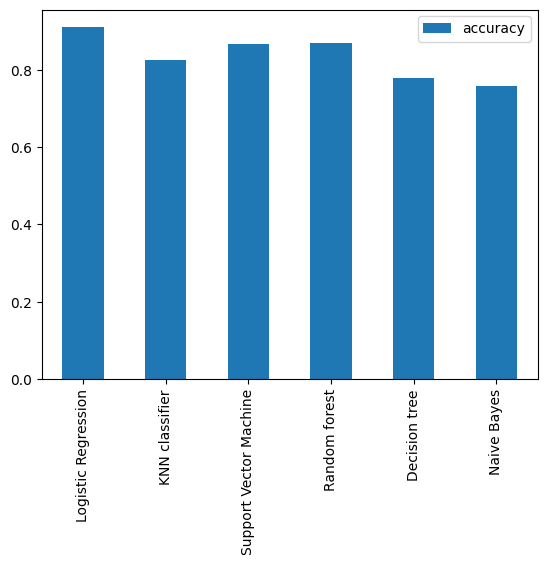

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [ ]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.0218119593410898,
 'Attrition': -0.0002486761873094651,
 'BusinessTravel': 0.028736953207975462,
 'DailyRate': 0.05424789183833742,
 'Department': 0.0004814300225215422,
 'DistanceFromHome': -2.5714034523804745e-05,
 'Education': -0.2995833641012223,
 'EducationField': 0.25088316417677897,
 'EmployeeCount': 0.00023899713602080927,
 'EmployeeNumber': -0.37779366147379884,
 'EnvironmentSatisfaction': -0.13748730001979492,
 'Gender': -0.30644355151492403,
 'HourlyRate': -5.908859981291177e-05,
 'JobInvolvement': 6.730035057899026e-06,
 'JobLevel': 0.17973175285588114,
 'JobRole': 0.0,
 'JobSatisfaction': 1.3358154601607226,
 'MaritalStatus': -0.008095309264974242,
 'MonthlyIncome': 0.005242781567042977,
 'MonthlyRate': -0.14608368586239567,
 'NumCompaniesWorked': 0.03851440180168422,
 'Over18': -0.31959717401146936,
 'OverTime': -0.0616832378428665,
 'PercentSalaryHike': -0.10811575294764703,
 'PerformanceRating': -0.21420108634102686,
 'RelationshipSatisfaction': 0.10992601843

<Axes: title={'center': 'Feature Importance'}>

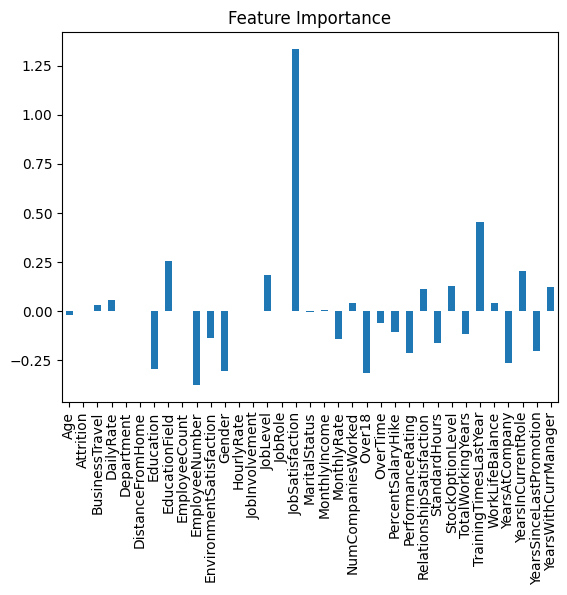

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [ ]:
# import pickle

# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(lr)

# # Load the pickled model
# lr_from_pickle = pickle.loads(saved_model)

# # Use the loaded pickled model t

In [ ]:
# # loading dependency
# import joblib

# # saving our model - model - model , filename - model_lr
# joblib.dump(lr , 'model_lr')

# # opening the file- model_jlib
# m_jlib = joblib.load('model_lr')

# # check prediction
# m_jlib.predict(X_test) # similar output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,